In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
regions_datadir = "/data/uscuni-ulce/"
morphotopes_dir = '/data/uscuni-ulce/processed_data/morphotopes/'
model_params = '_100_0_None_None_False'
kernel = 'gaussian'
spatial_lag = 3

In [3]:
to_drop = [
        'stcSAl','stbOri','stcOri','stbCeA',
        'ldkAre', 'ldkPer', 'lskCCo', 'lskERI','lskCWA', 'ltkOri', 'ltkWNB', 'likWBB', 'likWCe',
# 'sdbAre', 'ssbCCM', 'sdcLAL'
    # 'mibCCo', 'mibLAL'
]

In [4]:
region_id = 69333

In [13]:
data = pd.read_parquet(f'{morphotopes_dir}data_morphotopes_{region_id}{model_params}.pq')
data.index = str(region_id) + '_' + data.index
data = data.iloc[:, :-1]

component_data = data.drop(columns=['percentile_25', 'percentile_75', 'median', 'std'], level=1)
component_data = component_data.drop(columns=to_drop, level=0)
component_data.columns =  component_data.columns.get_level_values(0)


# lag_data = pd.read_parquet(f'/data/uscuni-ulce/processed_data/morphotope_lagged_data/{region_id}_{kernel}_{spatial_lag}.pq')
# data = lag_data.join(component_data)


data = component_data.copy()


data = data[data.index.str[-2:] != '-1']

In [14]:
# component_data = data.drop(columns=['percentile_25', 'percentile_75', 'median', 'std'], level=1)
# component_data = component_data.drop(columns=to_drop, level=0)
# component_data.columns =  ['_'.join(col).strip() for col in component_data.columns.values]

In [15]:
vals = StandardScaler().fit_transform(data)
component_data = pd.DataFrame(vals, columns=data.columns, index=data.index)
component_data = component_data.drop(component_data.columns[component_data.std() == 0], axis=1)

# component_data = component_data[component_data.index >= 0]
vals = np.nan_to_num(component_data)
component_data = pd.DataFrame(vals, columns=component_data.columns, index=component_data.index)


In [20]:
component_data

,sdbAre,sdbPer,sdbCoA,ssbCCo,ssbCor,ssbSqu,ssbERI,ssbElo,ssbCCM,ssbCCD,...,sdsAre,mibCou,mibAre,mibLen,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo
69333_1005_0,-0.123372,0.133995,-0.117841,-1.438943,-0.327781,-0.707325,-0.563263,-1.480037,0.253824,0.353022,...,0.917173,-0.294212,-0.206408,-0.179313,-0.649846,0.256076,-0.265007,-0.266447,-0.311628,-0.311628
69333_1016_0,0.108377,0.296252,1.197244,-0.358459,-0.223565,-0.355483,0.147187,-0.530258,0.565090,-0.074197,...,-0.241135,-0.276641,-0.162677,-0.155061,-0.065203,0.421332,0.247388,-0.209271,0.012189,0.012189
69333_1016_1,-0.299267,-0.200756,-0.117841,-0.601869,-0.532134,-0.214705,-0.332271,-0.478666,-0.162623,-0.020591,...,-0.207437,-0.267980,-0.222638,-0.197402,-0.126676,0.158591,0.006640,-0.330431,-0.428682,-0.428682
69333_1016_2,-0.119676,-0.006226,-0.117841,0.090387,-0.136551,-0.390420,0.081089,0.075420,0.065984,-0.058917,...,-0.376893,-0.285047,-0.203640,-0.190592,0.479007,0.378448,0.506772,-0.313485,-0.196321,-0.196321
69333_1018_0,-0.118826,0.026334,-0.117841,-1.349890,-0.653763,-0.038032,-0.601995,-0.986326,0.235104,-0.031832,...,0.197399,-0.239501,-0.179674,-0.143722,-0.667605,0.028915,-0.507277,-0.181304,-0.239364,-0.239364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69333_978_0,-0.160606,0.062865,-0.117841,-0.742891,-0.335383,-0.895680,-0.346108,-0.594700,0.199633,0.164324,...,-0.332603,-0.286270,-0.209532,-0.183191,-0.044805,0.249098,0.059959,-0.282902,-0.251199,-0.251199
69333_979_0,1.855482,1.117329,-0.117841,-1.013883,-0.726328,-0.182955,0.618638,-1.305753,1.885684,0.050163,...,0.591247,-0.283163,0.118018,-0.060756,-0.500613,0.487350,-0.032195,0.057801,1.032359,1.032359
69333_991_0,-0.230424,-0.104004,-0.117841,-1.184201,-0.797093,-0.553026,0.246686,-1.418700,0.137278,-0.255738,...,-0.306713,-0.246477,-0.208904,-0.173831,-0.745887,0.191783,-0.483639,-0.244938,-0.361850,-0.361850
69333_997_0,-0.192625,0.026961,-0.117841,-2.058251,-1.093044,0.146406,0.512368,-2.409765,0.438465,-0.154240,...,-0.253349,-0.263844,-0.200221,-0.159513,-1.245829,0.226489,-0.831116,-0.194668,-0.346883,-0.346883


In [17]:
%%time
linkage = 'ward'
metric = 'euclidean'

from sklearn.cluster import AgglomerativeClustering
from core.cluster_validation import get_linkage_matrix
clusterer = AgglomerativeClustering(linkage=linkage,
                                    metric=metric,
                                    compute_full_tree=True,
                                    compute_distances=True)
model = clusterer.fit(component_data.values)
linkage_matrix = get_linkage_matrix(model)

CPU times: user 54.9 ms, sys: 3 ms, total: 57.9 ms
Wall time: 57.3 ms


In [18]:
import sys
sys.setrecursionlimit(10000)

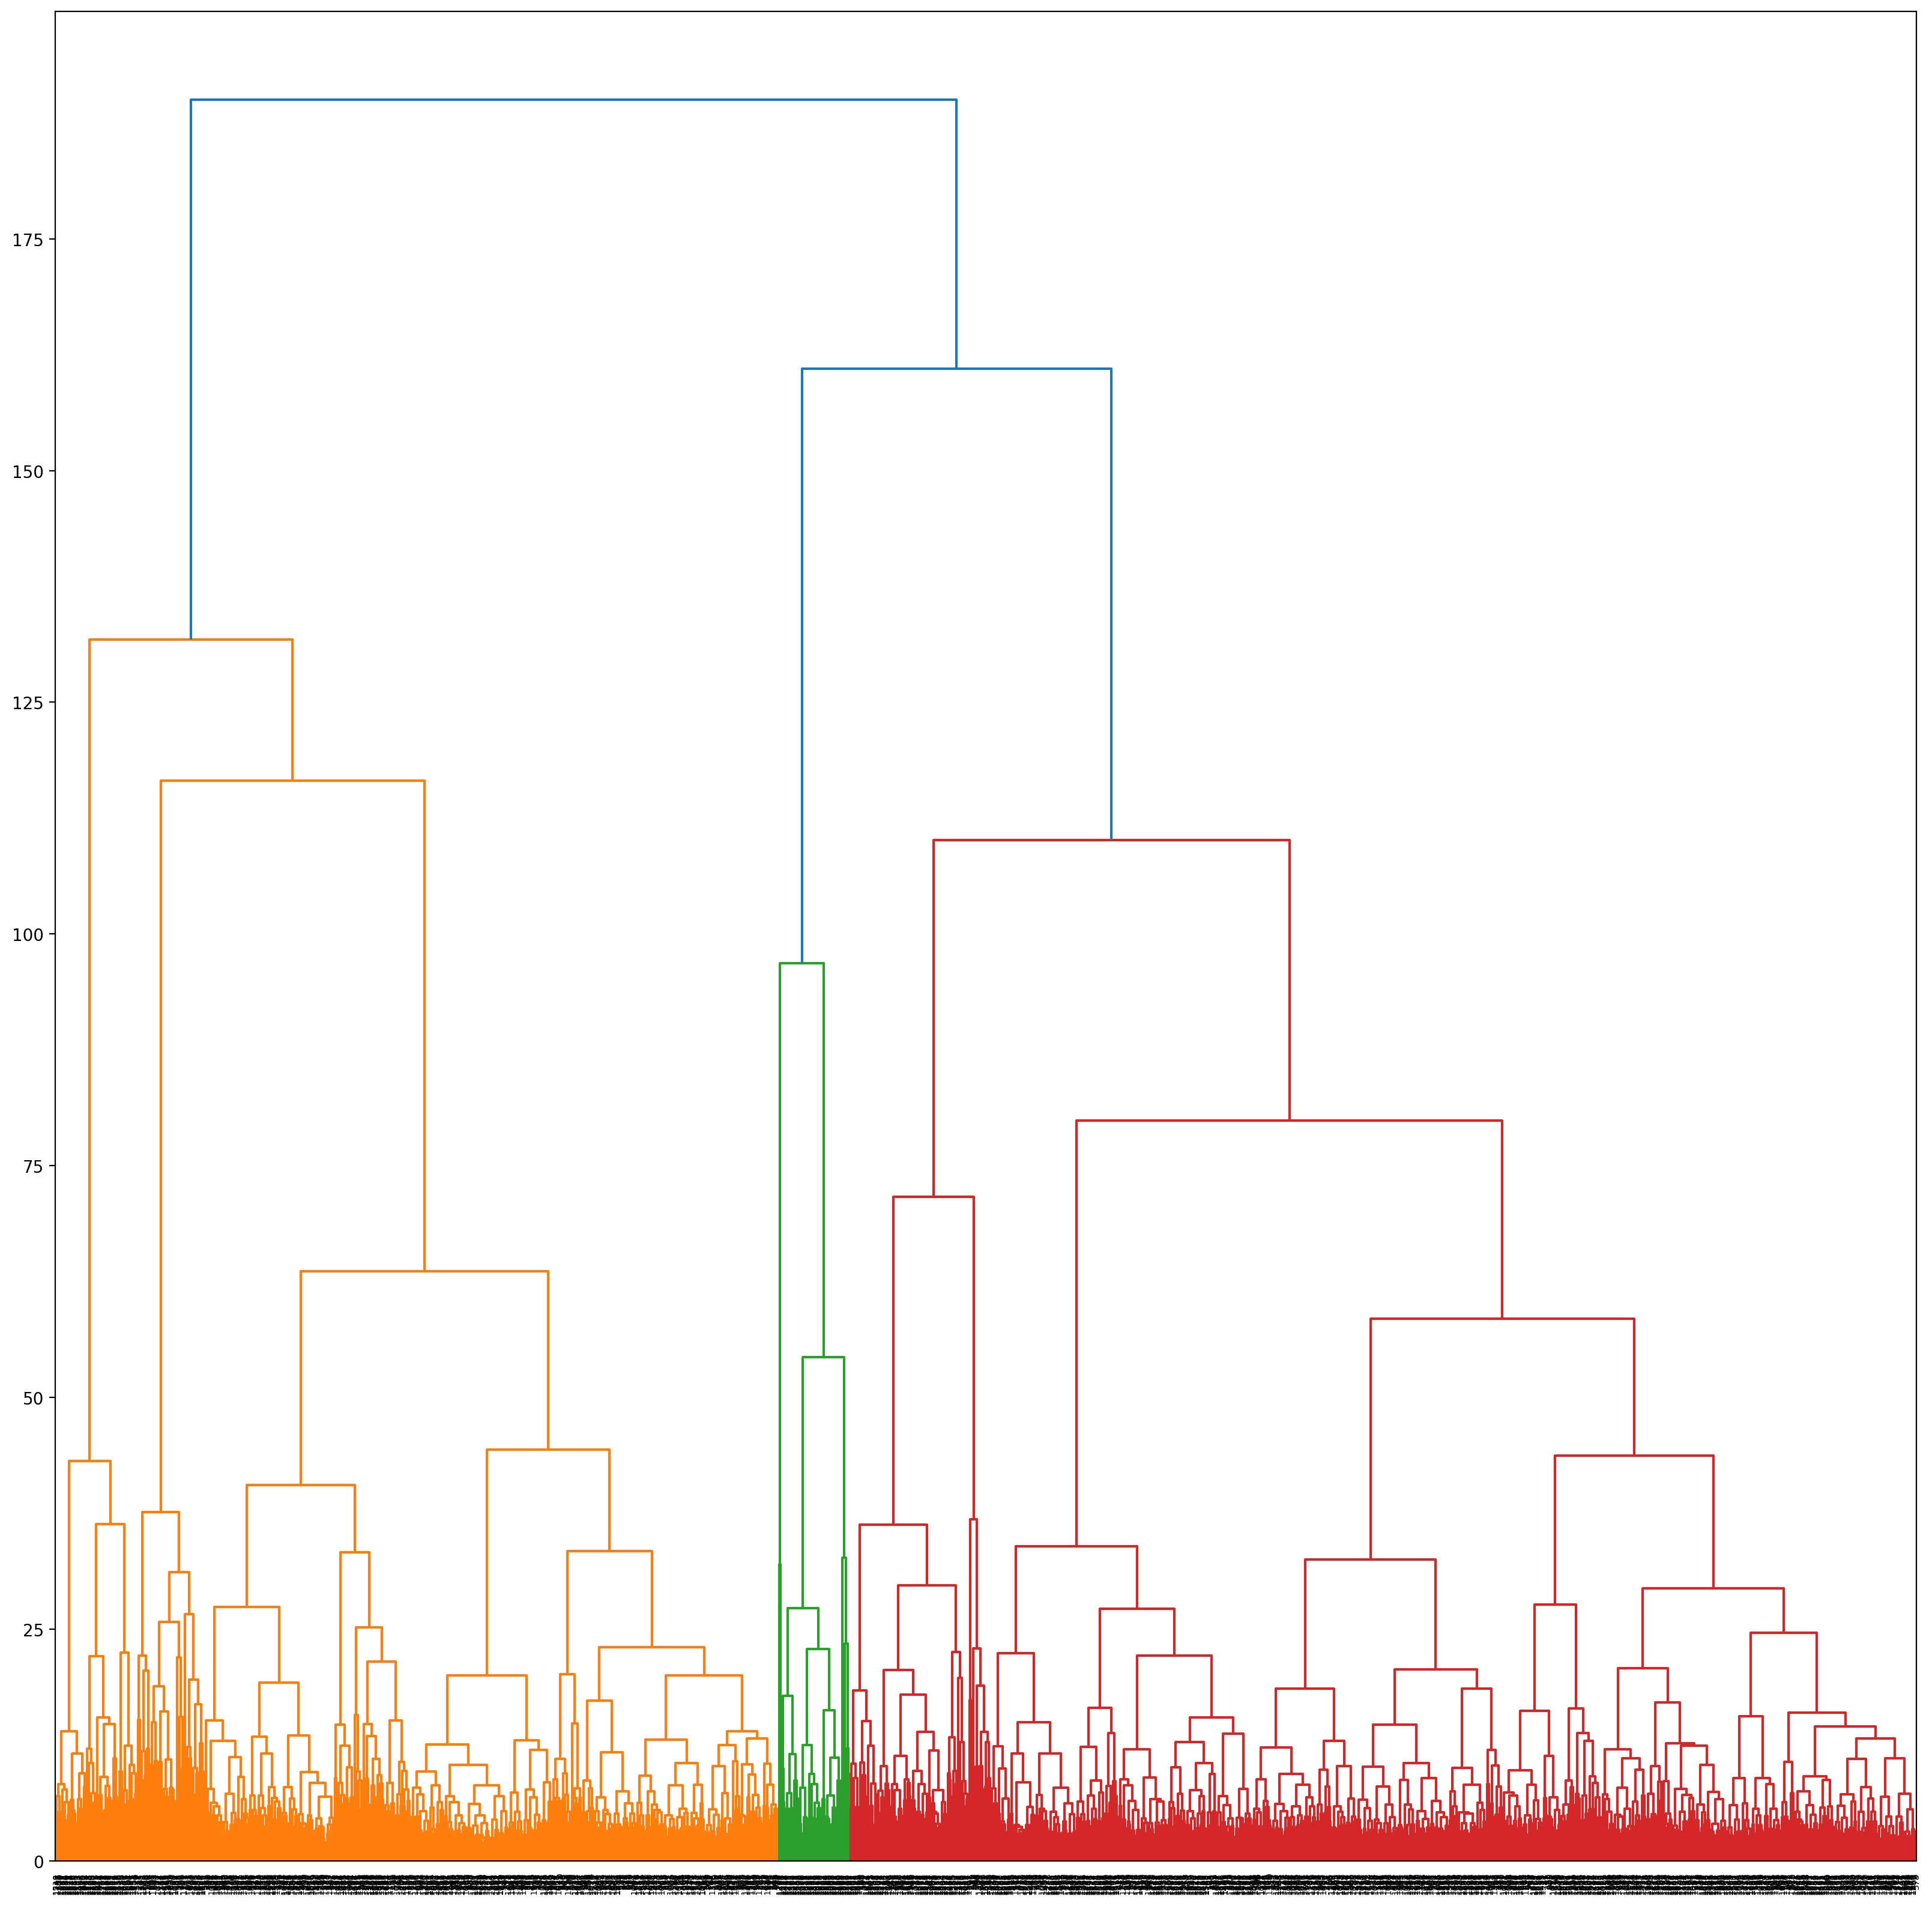

In [19]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
fig,ax = plt.subplots(figsize=(20,20), dpi=200)
_ = dendrogram(linkage_matrix,ax=ax)

In [19]:
def get_dendrogram_scatter_data(linkage_matrix):
    
    R = dendrogram(linkage_matrix, no_plot=True)
    xs = np.array(R['icoord'])[:, 1:3].sum(axis=1)
    ys = np.array(R['dcoord'])[:, 1]

    ### fast way to find out where in ii, each node is equivalent to np.nonzero(ii == j)
    ii = np.argsort(ys)
    sorter = np.argsort(ii)
    positions = sorter[np.searchsorted(ii, np.arange(0, len(R['dcoord'])), sorter=sorter)]
    nodes = linkage_matrix[positions, ] 

    scatter_df = pd.DataFrame(nodes, columns=['child', 'parent', 'dist', 'size'])
    scatter_df['x'] = xs
    scatter_df['y'] = ys
    
    return scatter_df

In [12]:
scatter_df = get_dendrogram_scatter_data(linkage_matrix)

In [13]:
import jscatter
import ipywidgets

In [14]:
scatter = jscatter.Scatter(data=scatter_df, x='x', y='y', height=640, width=1280)
scatter.axes(grid=True)

output = ipywidgets.Output()

@output.capture(clear_output=True)
def selection_change_handler(change):
    display(scatter_df.loc[change.new].style.hide(axis='index'))
            
scatter.widget.observe(selection_change_handler, names=["selection"])

ipywidgets.HBox([scatter.show(), output])


In [16]:
target_morphotope = '69333_849_104'

target_morphotope_idx = np.where(component_data.index == target_morphotope)[0][0]
print(target_morphotope_idx)
target_scatter_node = np.where((scatter_df['child'] == target_morphotope_idx) | (scatter_df['parent'] == target_morphotope_idx))
target_scatter_node

scatter.zoom([target_scatter_node])
# scatter.selection(target_scatter_node)

1392


In [25]:
selected_node = scatter.selection()[0]
children_ids = get_children(scatter_df.loc[selected_node, 'child'].astype(int), scatter_df.loc[selected_node, 'parent'].astype(int))
children_morphotopes = component_data.iloc[children_ids].index

In [27]:
# etcs[etcs.morph.isin(children_morphotopes)].explore(prefer_canvas=True, tiles='CartoDB positron')

In [19]:
region_id = 69333


etcs = gpd.read_parquet(f'/data/uscuni-ulce/processed_data/tessellations/tessellation_{region_id}.parquet')
etcs['morph'] = "-1"

morphotopes = pd.read_parquet(f'/data/uscuni-ulce/processed_data/morphotopes/tessellation_labels_morphotopes_{region_id}{model_params}.pq')
morphotopes.loc[:, 'morphotope_label'] =  morphotopes.values[:, 0]
etcs.loc[morphotopes.index, 'morph'] = str(region_id) + '_' + morphotopes.values

In [20]:
import numpy as np

def get_original_observations(Z, node_id, n):
    """
    Recursively retrieves all original observations that belong to a cluster node.

    Parameters:
    Z : numpy.ndarray
        Linkage matrix of shape (n-1, 4) where each row [Z[i, 0], Z[i, 1], Z[i, 2], Z[i, 3]]
        contains two merged clusters and additional metadata.
    node_id : int
        The node (cluster) ID for which to retrieve original observations.
    n : int
        The total number of original observations.

    Returns:
    observations : list
        List of original observation indices that are part of the specified node_id.
    """
    # If the node_id refers to an original observation, return it
    if node_id < n:
        return [node_id]
    
    # Otherwise, recursively find observations for the two merged clusters
    cluster_idx = node_id - n # Adjust the index because new clusters start from n
    
    left_cluster = int(Z[cluster_idx, 0])
    right_cluster = int(Z[cluster_idx, 1])
    
    left_observations = get_original_observations(Z, left_cluster, n)
    right_observations = get_original_observations(Z, right_cluster, n)
    
    return left_observations + right_observations





# def dendogram_idx_nodes(idx, node_id, linkage, n_children, out=[]):
    
#     if node_id < 0:
#        return
#     left, right = linkage[idx]
#     out.append((idx, node_id))
#     # recurse over the right node
#     if right >= n_children: # make sure it's not a leaf node
#         node_id -= 1
#         node_id = dendogram_idx_nodes(right - (n_children + 1), node_id,
#                                      linkage, n_children, out)
#     if left >= n_children: # make sure it's not a leaf node
#         node_id -= 1
#         node_id = dendogram_idx_nodes(left - (n_children +1), node_id,
#                                      linkage, n_children, out)
#     return node_id

In [21]:
def get_children(left, right):
    res1 = get_original_observations(linkage_matrix, left, component_data.shape[0])
    res2 = get_original_observations(linkage_matrix, right, component_data.shape[0])
    res = np.union1d(res1, res2)
    return res

In [24]:
assert get_children(int(linkage_matrix[123, 0]), int(linkage_matrix[123, 1])).shape[0] == linkage_matrix[123, 3]
assert get_children(int(linkage_matrix[321, 0]), int(linkage_matrix[321, 1])).shape[0] == linkage_matrix[321, 3]
assert get_children(int(linkage_matrix[-1, 0]), int(linkage_matrix[-1, 1])).shape[0] == linkage_matrix[-1, 3]


In [20]:
pd.Series(linkage_matrix[:, 2]).describe()

count    74144.000000
mean         4.825639
std          9.725887
min          0.028006
25%          2.344760
50%          3.499886
75%          5.199024
max       1208.283231
dtype: float64

In [21]:
cutoff = 20

kmeans_clusters = fcluster(linkage_matrix, t=cutoff, criterion='distance')


In [22]:
# ward_clusters = fcluster(linkage_matrix, t=cutoff, criterion='distance')
# ward_clusters = pd.Series(ward_clusters, index=np.arange(np.unique(kmeans_clusters).shape[0]))
# np.unique(ward_clusters)

In [23]:
# clusters = pd.Series(kmeans_clusters).map(lambda x: ward_clusters.loc[x]).values

In [24]:
clusters = kmeans_clusters.copy()

In [25]:
region_id = 4


etcs = gpd.read_parquet(f'/data/uscuni-ulce/processed_data/tessellations/tessellation_{region_id}.parquet')
etcs['label'] = -1

morphotopes = pd.read_parquet(f'/data/uscuni-ulce/processed_data/morphotopes/tessellation_labels_morphotopes_{region_id}{model_params}.pq')
morphotopes.loc[:, 'morphotope_label'] =  str(region_id) + '_' + morphotopes.values[:, 0]

region_clusters = pd.Series(clusters, component_data.index)
region_clusters

4_0_-1     187
4_0_0      562
4_0_1       43
4_0_10     155
4_0_11      82
          ... 
4_99_96     69
4_99_97    263
4_99_98    263
4_99_99    217
4_9_-1     511
Length: 74145, dtype: int32

In [26]:
region_clusters.nunique()

1076

In [27]:
region_clusters.value_counts()

109     418
108     366
257     342
115     341
86      334
       ... 
47        1
926       1
1071      1
932       1
1069      1
Name: count, Length: 1076, dtype: int64

In [28]:
%%time
## assign morphotope clusters to tess cells

etcs.loc[morphotopes.index, 'label'] = morphotopes.morphotope_label.map(lambda x: region_clusters.loc[x] if x in region_clusters.index else -1).values


CPU times: user 24.5 s, sys: 330 ms, total: 24.8 s
Wall time: 24.6 s


In [29]:
# %%time
# # # # relabel morphotopes for plotting
# morph_dict = pd.Series(np.arange(np.unique(morphotopes.values).shape[0]),
#                        np.unique(morphotopes.values))
# etcs.loc[morphotopes.index, 'label'] = morphotopes.map(lambda x: morph_dict.loc[x]).values
# etcs['morph'] = '-1'
# etcs.loc[morphotopes.index, 'morph'] = morphotopes.values

In [35]:
etcs.label.value_counts()

label
184     440385
112     243933
109      86622
115      71529
108      71445
         ...  
931          1
1064         1
1070         1
59           1
268          1
Name: count, Length: 1077, dtype: int64

In [36]:
from core.cluster_validation import get_color
layer.get_fill_color = get_color(etcs.label)

In [58]:
etcs = etcs.to_crs(epsg=4326)

In [59]:

etcs['geometry'] = etcs.geometry.make_valid()

In [ ]:
%%time
import lonboard
# plotting = tessellation[tessellation.index.isin(X_train.index)].copy()
layer = lonboard.SolidPolygonLayer.from_geopandas(etcs, opacity=.08)

In [ ]:
from sidecar import Sidecar
sc = Sidecar(title='Final Clusters')
m = lonboard.Map(layer, basemap_style=lonboard.basemap.CartoBasemap.Positron)
with sc:
    display(m)

In [ ]:
from core.cluster_validation import get_color
layer.get_fill_color = get_color(etcs.label)